In [17]:
import pandas as pd
import numpy as np
import glob
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS 
# from textblob import TextBlob
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import nltk.data
# nltk.download('punkt')
import string

from langdetect import detect_langs

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from textatistic import Textatistic

import spacy

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error, r2_score
import re

import xgboost as xgb

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.metrics import classification_report # Module to calculate performance metrics
from sklearn.metrics import confusion_matrix # Module to calculate the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Module to display the confusion matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt # Module to help draw the confusion matrix

# Code to silence the warnings generated by GridSearch
import warnings
warnings.filterwarnings("ignore")
import random
import plotly.express as px

In [38]:
Data = pd.read_csv('Reviews.csv')

In [39]:
Data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [40]:
# Add Helpfulness Column
Data['Helpfulness'] = Data['HelpfulnessNumerator']/Data['HelpfulnessDenominator']
Data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN


In [41]:
# Examine some text:
def show_some_sample_review(Score, Count_of_Records):
    sample_texts = Data[['Summary', 'Text']][Data['Score'] == Score][0:Count_of_Records].reset_index()
    for i in range(0, Count_of_Records):
        print('Summary: ' + sample_texts['Summary'][i] + ' --- Text: ' + sample_texts['Text'][i] + '\n')

In [42]:
show_some_sample_review(1, 10)

Summary: Not as Advertised --- Text: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Summary: My Cats Are Not Fans of the New Food --- Text: My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.

Summary: Nasty No flavor --- Text: The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again

Summary: Don't like it --- Text: This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.

Summary: stale product. --- Text: Arrived in 6 days and were so s

In [43]:
# Check distribution of Score: 
Distribution_Score = Data.groupby(['Score'])[['Text', 'Helpfulness']].count()
Distribution_Score['Percent_People_Indicate_Helpfulness'] = Distribution_Score['Helpfulness']/Distribution_Score['Text']
Distribution_Score

,Text,Helpfulness,Percent_People_Indicate_Helpfulness
Score,,,
1,52268,40002,0.765325
2,29769,19165,0.643791
3,42640,24217,0.567941
4,80655,38639,0.479065
5,363122,176379,0.485729


### Lower score have more users indicate helpfulness. 76% vs 47%

<AxesSubplot:xlabel='HelpfulnessDenominator', ylabel='Count'>

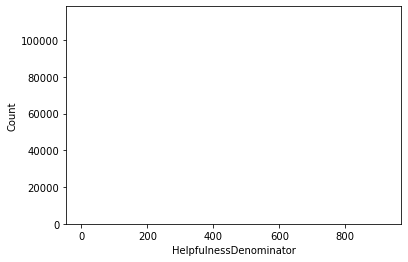

In [51]:
sns.histplot(data = Data[(Data['Helpfulness'].notnull()) & (Data['Helpfulness']<=1)], x = 'HelpfulnessDenominator', binwidth = 0.05)

<AxesSubplot:xlabel='Helpfulness', ylabel='Count'>

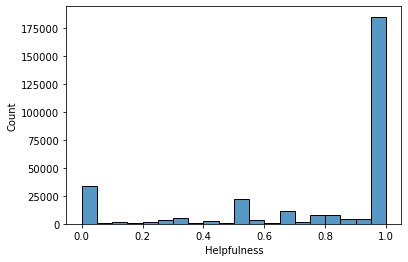

In [52]:
sns.histplot(data = Data[(Data['Helpfulness'].notnull()) & (Data['Helpfulness']<=1)], x = 'Helpfulness', binwidth = 0.05)

In [10]:
# Filter to only data with Helpfulness value not NAN
Data_Sample = Data[Data['Helpfulness'].notnull()].reset_index()
Data_Sample

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
3,8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0
4,10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298397,568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.0
298398,568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.0
298399,568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.0
298400,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0


# Step 1: Feature creation

In [11]:
# Change all words in the text that are longer than 100 characters to '-'
def hyphenate_long_words(text):
    pattern = re.compile(r'\b\w{90,}\b')
    matches = pattern.findall(text)
    for match in matches:
        replacement = '-'
        text = text.replace(match, replacement)
    return text

In [12]:
# Tokenize each item in the Text column
word_tokens = [word_tokenize(review) for review in Data_Sample.Text]
sent_tokens = [sent_tokenize(review) for review in Data_Sample.Text]
blob = [TextBlob(review) for review in Data_Sample.Text]

'This is a - word that exceeds the maximum length of 100 characters and needs to be hyphenated.'

In [15]:
# Create an empty list to store the length of the Text
len_tokens = []
len_sent = []
Count_Punct = []
polarity = []
subjectivity = []
Readablitys = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
    if i % 1000 == 0:
        print(i)
        
    try:
        len_tokens.append(len(word_tokens[i]))
        len_sent.append(len(sent_tokens[i]))
        polarity.append(blob[i].sentiment[0])
        subjectivity.append(blob[i].sentiment[1])

        punctuation_count = 0
        for word in word_tokens[i]:
            if word in string.punctuation:
                punctuation_count += 1
        Count_Punct.append(punctuation_count)

        if len(word_tokens[i]) > 10 and len(sent_tokens[i]) >= 2 :
            Readablity = Textatistic(hyphenate_long_words(Data_Sample['Text'][i])).scores['flesch_score']
        else:
            Readablity = 100
        Readablitys.append(Readablity)
    except ValueError:
        Readablity = 70
        Readablitys.append(Readablity)
        print(f"{Data_Sample['Text'][i]} ValueError")
        continue
    except ZeroDivisionError:
        Readablity = 70
        Readablitys.append(Readablity)
        print(f"{Data_Sample['Text'][i]} ZeroDivisionError")
        continue


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
"They found that two of the licorice compounds, licoricidin and licorisoflavan A, were the most effective antibacterial substances. These substances killed two of the major bacteria responsible for dental cavities and two of the bacteria that promote gum disease. One of the compounds -- licoricidin -- also killed a third gum disease bacterium. The researchers say that these substances could treat or even prevent oral infections."<br /><br />file:///Users/roaeja/Desktop/Health/Dried%20licorice%20root%20fights%20the%20bacteria%20that%20cause%20tooth%20decay%20and%20gum%20disease,%20study%20finds.webarchive ValueError
18000
19000
20000
"They found that two of the licorice compounds, licoricidin and licorisoflavan A, were the most effective antibacterial substances. These substances killed two of the major bacteria responsible for dental cavities and two of the bacteria that promote gum disease. 

In [18]:
len(len_tokens), len(len_sent), len(polarity), len(subjectivity), len(Count_Punct), len(Readablitys)

(298402, 298402, 298402, 298402, 298402, 298402)

In [19]:
# Create a new feature for the lengh of each review
Data_Sample['n_words'] = len_tokens 
Data_Sample['n_sents'] = len_sent 
Data_Sample['polarity'] = polarity 
Data_Sample['subjectivity'] = subjectivity 
Data_Sample['n_punct'] = Count_Punct 
Data_Sample['Readablity'] = Readablitys 

In [20]:
Data_Sample

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,n_words,n_sents,polarity,subjectivity,n_punct,Readablity
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,51,3,0.450000,0.433333,3,83.082500
1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,109,8,0.133571,0.448571,15,93.468140
2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,46,3,0.166667,0.533333,5,77.412114
3,8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,29,3,0.428571,0.545238,2,99.278462
4,10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,184,4,0.208594,0.682478,29,87.806431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298397,568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.0,168,12,0.162252,0.522222,17,83.513963
298398,568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.0,38,3,0.041667,0.437500,4,95.802255
298399,568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.0,59,3,-0.099271,0.501667,5,74.401212
298400,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,76,5,-0.021875,0.418750,8,84.642955


In [ ]:
# Data_Sample.to_csv('Step1 Combined Data.csv')
# Data_Sample = pd.read_csv('Step1 Combined Data.csv')

In [19]:
# Data_Sample.to_parquet('Step1 Combined Data.parquet')
Data_Sample = pd.read_parquet('Step1 Combined Data.parquet')

In [9]:
Data_Sample

,Unnamed: 0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,n_words,n_sents,polarity,subjectivity,n_punct,Readablity
0,0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,51,3,0.450000,0.433333,3,83.082500
1,1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,109,8,0.133571,0.448571,15,93.468140
2,2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,46,3,0.166667,0.533333,5,77.412114
3,3,8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,29,3,0.428571,0.545238,2,99.278462
4,4,10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,184,4,0.208594,0.682478,29,87.806431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298397,298397,568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.0,168,12,0.162252,0.522222,17,83.513963
298398,298398,568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.0,38,3,0.041667,0.437500,4,95.802255
298399,298399,568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.0,59,3,-0.099271,0.501667,5,74.401212
298400,298400,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,76,5,-0.021875,0.418750,8,84.642955


In [20]:
# Load the en_core_web_m model
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Function to preprocess text
def preprocess(text):
        # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

# Apply preprocess to ted['transcript']
Data_Sample['Text'] = Data_Sample['Text'].str.lower()
Data_Sample['Text_Cleaned'] = Data_Sample['Text'].apply(preprocess)

In [21]:
Data_Sample['Text_Cleaned'][Data_Sample['Text_Cleaned'].str.contains(r'With', na=True)]

Series([], Name: Text_Cleaned, dtype: object)

In [ ]:
# Data_Sample.to_parquet('Step2 Combined Data.parquet')
Data_Sample = pd.read_parquet('Step2 Combined Data.parquet')

In [24]:
def proper_nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

def nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

# Apply Count of PRORN AND NOUN columns
Data_Sample['n_PROPN'] = Data_Sample['Text'].apply(proper_nouns)
Data_Sample['n_NOUN'] = Data_Sample['Text'].apply(nouns)

KeyboardInterrupt: 

In [146]:
# Data_Sample.to_parquet('Step3 Combined Data.parquet')
# Data_Sample = pd.read_parquet('Step3 Combined Data.parquet')
# Data_Sample

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,Helpfulness,n_words,n_sents,polarity,subjectivity,n_punct,Readablity,Text_Cleaned,n_PROPN,n_NOUN
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,...,1.0,51,3,0.450000,0.433333,3,83.082500,I buy Vitality dog food product find good qual...,2,8
1,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",...,1.0,109,8,0.133571,0.448571,15,93.468140,confection century light pillowy citrus gelati...,11,12
2,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,...,1.0,46,3,0.166667,0.533333,5,77.412114,look secret ingredient Robitussin I believe I ...,4,5
3,8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,...,1.0,29,3,0.428571,0.545238,2,99.278462,right I sprout cat eat grass love I rotate Whe...,2,2
4,10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,...,1.0,184,4,0.208594,0.682478,29,87.806431,I know cactus tequila unique combination ingre...,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19509,19510,B001EO5QO6,A3VL263FW0O1JL,Rivka,1,1,5,1198368000,Fresh and delicious!,...,1.0,69,4,0.071581,0.411467,4,86.218173,health care provider recommend eat ounce raw a...,0,14
9996,19510,19511,B001EO5QO6,A23MGS2U5PPBY1,"Ethann Makinenni ""Ethann""",0,1,4,1173571200,They are great,...,0.0,28,2,0.571429,0.633929,4,88.905000,I eat nuts daily right I eat fruit wonderful w...,0,1
9997,19512,19513,B000E3VANE,A1F7SX3GNVBNE3,"Joshua G. Feldman ""Technophile""",6,6,5,1181001600,This is the best flavor of Zatarain's - univer...,...,1.0,287,19,0.158333,0.390946,36,89.644084,I love flavor Zatarain I love cook cajun style...,8,50
9998,19513,19514,B000E3VANE,A5N60O5P83HSX,A. Newhouse,1,1,5,1311897600,"Great flavor, convenient to buy by the case",...,1.0,146,5,0.143348,0.412798,23,82.019130,box mix I buy locally good thing like flavor u...,3,22


In [ ]:
# Step 2: Building a vectorizer

In [26]:
# Since TfidfVectorizer get ride of the too common words, no need to remove stopwords
# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(Data_Sample.Text_Cleaned)
# Create sparse matrix from the vectorizer
X = vect.transform(Data_Sample.Text_Cleaned)
# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    actually  add  amazon  arrive      away  bad  bag  bar  bean  big  ...   
0       0.0  0.0     0.0     0.0  0.000000  0.0  0.0  0.0   0.0  0.0  ...  \
1       0.0  0.0     0.0     0.0  0.000000  0.0  0.0  0.0   0.0  0.0  ...   
2       0.0  0.0     0.0     0.0  0.000000  0.0  0.0  0.0   0.0  0.0  ...   
3       0.0  0.0     0.0     0.0  0.000000  0.0  0.0  0.0   0.0  0.0  ...   
4       0.0  0.0     0.0     0.0  0.140617  0.0  0.0  0.0   0.0  0.0  ...   

   variety      want  water  way  week   wo  wonderful  work  worth  year  
0      0.0  0.000000    0.0  0.0   0.0  0.0        0.0   0.0    0.0   0.0  
1      0.0  0.000000    0.0  0.0   0.0  0.0        0.0   0.0    0.0   0.0  
2      0.0  0.000000    0.0  0.0   0.0  0.0        0.0   0.0    0.0   0.0  
3      0.0  0.000000    0.0  0.0   0.0  0.0        0.0   0.0    0.0   0.0  
4      0.0  0.217749    0.0  0.0   0.0  0.0        0.0   0.0    0.0   0.0  

[5 rows x 200 columns]


In [29]:
# reviews_transformed.to_parquet('Step4 Combined reviews_transformed.parquet')
reviews_transformed = pd.read_parquet('Step4 Combined reviews_transformed.parquet')
reviews_transformed

,actually,add,amazon,arrive,away,bad,bag,bar,bean,big,...,variety,want,water,way,week,wo,wonderful,work,worth,year
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.140617,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.217749,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298397,0.000000,0.000000,0.0,0.0,0.136610,0.0,0.0,0.0,0.0,0.126969,...,0.0,0.105772,0.0,0.10994,0.0,0.0,0.0,0.112558,0.0,0.0
298398,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
298399,0.303987,0.249997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
298400,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [31]:
Other_Features = Data_Sample[['n_words', 'n_sents', 'polarity', 'subjectivity','n_punct', 'Readablity']]
# Combine the vectorizer with other feature columns:
Features = pd.concat([reviews_transformed, Other_Features], axis=1)
Features

,actually,add,amazon,arrive,away,bad,bag,bar,bean,big,...,wonderful,work,worth,year,n_words,n_sents,polarity,subjectivity,n_punct,Readablity
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,51,3,0.450000,0.433333,3,83.082500
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,109,8,0.133571,0.448571,15,93.468140
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,46,3,0.166667,0.533333,5,77.412114
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,29,3,0.428571,0.545238,2,99.278462
4,0.000000,0.000000,0.0,0.0,0.140617,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,184,4,0.208594,0.682478,29,87.806431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298397,0.000000,0.000000,0.0,0.0,0.136610,0.0,0.0,0.0,0.0,0.126969,...,0.0,0.112558,0.0,0.0,168,12,0.162252,0.522222,17,83.513963
298398,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,38,3,0.041667,0.437500,4,95.802255
298399,0.303987,0.249997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,59,3,-0.099271,0.501667,5,74.401212
298400,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,76,5,-0.021875,0.418750,8,84.642955


In [3]:
# Features.to_parquet('Step5 Combined Features.parquet')
Features = pd.read_parquet('Step5 Combined Features.parquet')
Features

,actually,add,amazon,arrive,away,bad,bag,bar,bean,big,...,wonderful,work,worth,year,n_words,n_sents,polarity,subjectivity,n_punct,Readablity
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,51,3,0.450000,0.433333,3,83.082500
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,109,8,0.133571,0.448571,15,93.468140
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,46,3,0.166667,0.533333,5,77.412114
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,29,3,0.428571,0.545238,2,99.278462
4,0.000000,0.000000,0.0,0.0,0.140617,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,184,4,0.208594,0.682478,29,87.806431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298397,0.000000,0.000000,0.0,0.0,0.136610,0.0,0.0,0.0,0.0,0.126969,...,0.0,0.112558,0.0,0.0,168,12,0.162252,0.522222,17,83.513963
298398,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,38,3,0.041667,0.437500,4,95.802255
298399,0.303987,0.249997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,59,3,-0.099271,0.501667,5,74.401212
298400,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,76,5,-0.021875,0.418750,8,84.642955


<AxesSubplot:xlabel='Helpfulness', ylabel='Count'>

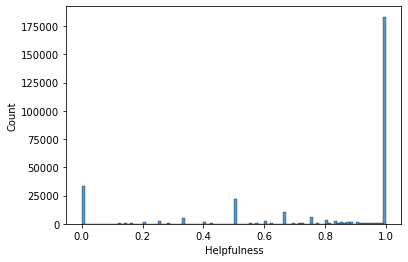

In [55]:
sns.histplot(data = Data_Sample[Data_Sample.Helpfulness <=1], x = 'Helpfulness', binwidth = 0.01)

<AxesSubplot:xlabel='HelpfulnessDenominator', ylabel='Count'>

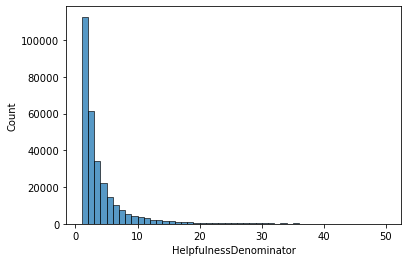

In [72]:
sns.histplot(data = Data_Sample[(Data_Sample.Helpfulness <=1) & (Data_Sample.HelpfulnessDenominator <=50)], x = 'HelpfulnessDenominator', binwidth = 1)

<AxesSubplot:xlabel='Helpfulness', ylabel='HelpfulnessDenominator'>

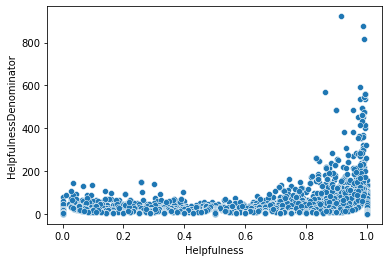

In [56]:
sns.scatterplot(data = Data_Sample[Data_Sample.Helpfulness <=1], x = "Helpfulness", y = "HelpfulnessDenominator")

<AxesSubplot:xlabel='HelpfulnessNumerator', ylabel='HelpfulnessDenominator'>

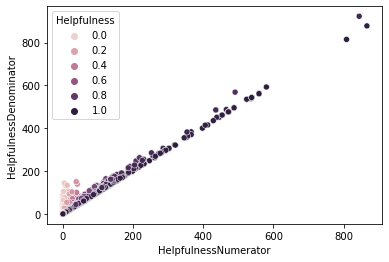

In [54]:
sns.scatterplot(data=Data_Sample[Data_Sample.Helpfulness <=1], x="HelpfulnessNumerator", y="HelpfulnessDenominator", hue="Helpfulness")

<AxesSubplot:xlabel='HelpfulnessNumerator', ylabel='HelpfulnessDenominator'>

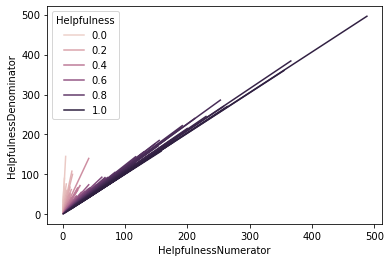

In [65]:
sns.lineplot(data=Data_Sample[(Data_Sample.Helpfulness <=1) & (Data_Sample.HelpfulnessDenominator <=500)], x="HelpfulnessNumerator", y="HelpfulnessDenominator", hue="Helpfulness")

<AxesSubplot:xlabel='HelpfulnessNumerator', ylabel='HelpfulnessDenominator'>

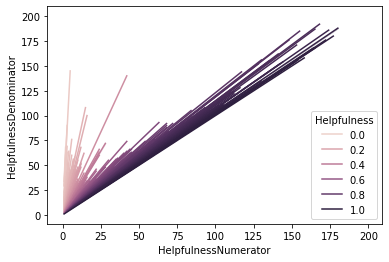

In [53]:
sns.lineplot(data=Data_Sample[(Data_Sample.Helpfulness <=1) & (Data_Sample.HelpfulnessDenominator <=200)], x="HelpfulnessNumerator", y="HelpfulnessDenominator", hue="Helpfulness")

In [73]:
Data_Sample[(Data_Sample.Helpfulness <=1) & (Data_Sample.Helpfulness >=0.8) & (Data_Sample.HelpfulnessDenominator >=10)]

,Unnamed: 0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,n_words,n_sents,polarity,subjectivity,n_punct,Readablity,Text_Cleaned
14,14,32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,mccann's instant oatmeal is great if you must ...,1.000000,231,11,0.220500,0.560333,26,82.414773,mccann instant oatmeal great oatmeal scrape mi...
15,15,33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,Good Instant,this is a good instant oatmeal from the best o...,1.000000,100,5,0.366154,0.533353,7,84.225000,good instant oatmeal good oatmeal brand use ca...
42,42,82,83,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,Forget Molecular Gastronomy - this stuff rocke...,i know the product title says molecular gastro...,1.000000,524,21,0.150227,0.604330,84,84.048370,I know product title molecular gastronomy let ...
78,78,158,159,B000ITVLE2,A3NID9D9WMIV01,"Louie Arrighi ""Lou da Joo""",17,19,5,1260057600,tastes very fresh,"<span class=""tiny""> length:: 0:26 mins<br /><b...",0.894737,130,3,0.450000,0.566667,32,86.266807,span length min br expiration date month day I...
150,150,287,288,B001UJEN6C,A1XM65S80UQ2MD,Joseph Kagan,13,13,5,1276214400,Great Natural Energy,"this is a fantastic product, and i wish it was...",1.000000,205,13,0.106502,0.510989,29,90.017515,fantastic product I wish readily available sto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298291,298291,568248,568249,B00374ZKQ0,A2ZIXZP46B737P,D. J. Bradley,19,20,5,1296172800,Great Alternative Sweetener,my review covers the stevia in the raw product...,0.950000,379,20,0.128760,0.462717,52,81.335163,review cover stevia raw product packet form I ...
298292,298292,568249,568250,B00374ZKQ0,A17V9XL4CWTQ6G,Chandler,38,45,1,1320192000,You'll need 3 packs to equal one pack of Truvi...,"first of all, i have no ties with truvia. in f...",0.844444,1010,37,0.022052,0.480625,198,92.086859,I tie truvia fact I decide replace truvia rece...
298293,298293,568250,568251,B00374ZKQ0,A1I1V7QUWSMYGA,Your Online Bookstore,13,15,5,1265760000,This is the only brand out there with minimal ...,i'm not 100% certain this is the same product ...,0.866667,223,10,0.009954,0.569973,30,85.521667,I certain product sell place I find review I w...
298296,298296,568253,568254,B00374ZKQ0,AOJTB8BZVZQPP,Frankie,8,10,5,1282694400,Very good stevia without any extra ingredients.,i bought them at shoprite (at 3.79 for a box o...,0.800000,255,6,0.278984,0.548077,36,71.666774,I buy shoprite box cheap seller I happy I enjo...


In [3]:
# Data_Sample.to_parquet('Step2 Combined Data.parquet')
Data_Sample = pd.read_parquet('Step2 Combined Data.parquet')
# Features.to_parquet('Step5 Combined Features.parquet')
Features = pd.read_parquet('Step5 Combined Features.parquet')

In [4]:
# Assign Label for categorical data 
Data_Sample['Helpfulness Label'] = 0
Data_Sample['Helpfulness Label'][(Data_Sample.Helpfulness >=0.8) & (Data_Sample.HelpfulnessDenominator >=10)] = 1

In [5]:
Data_Sample.groupby(['Helpfulness Label'])[['Text']].count()

,Text
Helpfulness Label,
0,282070
1,16332


# Step 3: Building a Regression Model

In [6]:
# Define X and y
y = Data_Sample.Helpfulness
X = Features
# Train/test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=456)

In [35]:
# linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the labels
y_predicted = lr.predict(X_test)

# Print accuracy score and confusion matrix on test set
# print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
# print(confusion_matrix(y_test, y_predicted)/len(y_test))

# print mean square error
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error: {mse}")

# R-squared (R2)
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

Mean squared error: 0.11027901359933429
R-squared: 0.09297375363044935


In [151]:
# ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict the labels
y_predicted = ridge.predict(X_test)

# print mean square error
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error: {mse}")

# R-squared (R2)
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

Mean squared error: 0.10907222363803055
R-squared: 0.06027922416924347


In [152]:
# SVR model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

# Predict the labels
y_predicted = svr.predict(X_test)

# print mean square error
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error: {mse}")

# R-squared (R2)
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

Mean squared error: 0.12537442168780513
R-squared: -0.08017371323414602


In [153]:
# random forest regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Predict the labels
y_predicted = rfr.predict(X_test)

# print mean square error
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error: {mse}")

# R-squared (R2)
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

Mean squared error: 0.10534827507087274
R-squared: 0.09236321145730675


In [154]:
# gradient boosting regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict the labels
y_predicted = gb_model.predict(X_test)

# print mean square error
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error: {mse}")

# R-squared (R2)
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

Mean squared error: 0.1052881443302189
R-squared: 0.09288127283328118


# Build Classification model

In [5]:
# Define X and y
y = Data_Sample['Helpfulness Label']
X = Features
# Train/test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=456)

In [6]:
# Unsampling 0 class to make the dataset balance between 2 labels
Label_0_indexs = list(Data_Sample.index[Data_Sample['Helpfulness Label'] == 0])
Label_1_indexs = list(Data_Sample.index[Data_Sample['Helpfulness Label'] == 1])

In [7]:
selected_records = random.sample(Label_0_indexs, len(Label_1_indexs)) + Label_1_indexs

In [8]:
Data_Sample.loc[selected_records].groupby(['Helpfulness Label'])[['Text']].count()

,Text
Helpfulness Label,
0,16332
1,16332


In [9]:
# Define X and y after unsampling some 0 class
y = Data_Sample.loc[selected_records]['Helpfulness Label']
X = Features.loc[selected_records]
# Train/test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=456)

In [36]:
# LogisticRegression
# Load the model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = lr_model.predict(X_test)
predicted_probabilities = lr_model.predict_proba(X_test)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
lr_model_results = classification_report(y_true=y_test, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings
lr_model_precision = precision_score(y_test, pred_val)
lr_model_recall = recall_score(y_test, pred_val)

positive_class_probabilities = predicted_probabilities[:, 1]
lr_model_auc = roc_auc_score(y_test, positive_class_probabilities)

print(f"Accuracy = {lr_model_results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {lr_model_results['weighted avg']['f1-score']:>.4f}")
print(f"precision = {lr_model_precision:>.4f}")
print(f"recall = {lr_model_recall:>.4f}")
print(f"auc = {lr_model_auc:>.4f}")

Accuracy = 64.80 %
Weighted Avg F1-score = 0.6470
precision = 0.6697
recall = 0.5946
auc = 0.7028


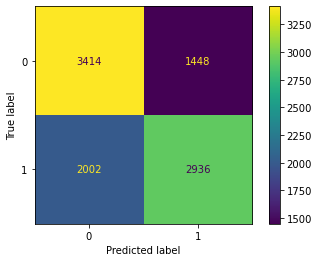

In [37]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [38]:
# Decision Tree
# Load the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = dt_model.predict(X_test)
predicted_probabilities = dt_model.predict_proba(X_test)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
dt_model_results = classification_report(y_true=y_test, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings
dt_model_precision = precision_score(y_test, pred_val)
dt_model_recall = recall_score(y_test, pred_val)

positive_class_probabilities = predicted_probabilities[:, 1]
dt_model_auc = roc_auc_score(y_test, positive_class_probabilities)

print(f"Accuracy = {dt_model_results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {dt_model_results['weighted avg']['f1-score']:>.4f}")
print(f"precision = {dt_model_precision:>.4f}")
print(f"recall = {dt_model_recall:>.4f}")
print(f"auc = {dt_model_auc:>.4f}")

Accuracy = 66.94 %
Weighted Avg F1-score = 0.6693
precision = 0.6680
recall = 0.6837
auc = 0.6695


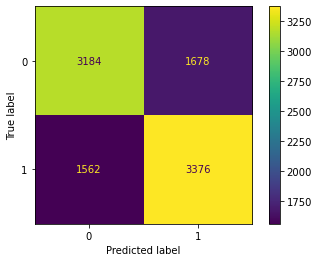

In [39]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [40]:
# Support Vector Machine
# Load the model
svc_model = SVC(probability=True)

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_test)
decision_scores = svc_model.decision_function(X_test)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
svc_model_results = classification_report(y_true=y_test, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings
svc_model_precision = precision_score(y_test, pred_val)
svc_model_recall = recall_score(y_test, pred_val)

scaler = MinMaxScaler()
calibrated_scores = scaler.fit_transform(decision_scores.reshape(-1, 1))
positive_class_probabilities = calibrated_scores[:,0]
svc_model_auc = roc_auc_score(y_test, positive_class_probabilities)

print(f"Accuracy = {svc_model_results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {svc_model_results['weighted avg']['f1-score']:>.4f}")
print(f"precision = {svc_model_precision:>.4f}")
print(f"recall = {svc_model_recall:>.4f}")
print(f"auc = {svc_model_auc:>.4f}")

Accuracy = 63.63 %
Weighted Avg F1-score = 0.6346
precision = 0.6623
recall = 0.5676
auc = 0.6835


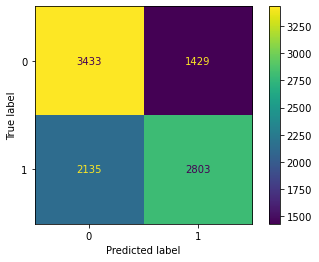

In [14]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [42]:
# XG Boost
# Init classifier
xgb_model = xgb.XGBClassifier()

# Fit
xgb_model.fit(X_train, y_train)

# Predict
pred_val = xgb_model.predict(X_test)
predicted_probabilities = xgb_model.predict_proba(X_test)

# We choose accuracy and weighted average f1-score as our metrics of choice
xgb_model_results = classification_report(y_true=y_test, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings
xgb_model_precision = precision_score(y_test, pred_val)
xgb_model_recall = recall_score(y_test, pred_val)

positive_class_probabilities = predicted_probabilities[:, 1]
xgb_model_auc = roc_auc_score(y_test, positive_class_probabilities)

print(f"Accuracy = {xgb_model_results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {xgb_model_results['weighted avg']['f1-score']:>.4f}")
print(f"precision = {xgb_model_precision:>.4f}")
print(f"recall = {xgb_model_recall:>.4f}")
print(f"auc = {xgb_model_auc:>.4f}")

Accuracy = 70.26 %
Weighted Avg F1-score = 0.7025
precision = 0.7093
recall = 0.6942
auc = 0.7686


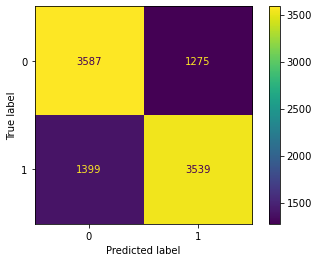

In [22]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

## Model Comparison

In [46]:
print("Model \t Accuracy \t Weighted Avg F1-score \t Precision \t Recall \t AUC")
print("-----------------------------------------------")

# Logistic Regression
# pred_test = lr_model.predict(X_test)
# results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"LR \t {lr_model_results['accuracy']*100:>.2f} % \t {lr_model_results['weighted avg']['f1-score']:>.4f}         \t {lr_model_precision:>.4f}  \t {lr_model_recall:>.4f}  \t {lr_model_auc:>.4f}")

# Decision Tree
# pred_test = dt_model.predict(X_test)
# results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"DT \t {dt_model_results['accuracy']*100:>.2f} % \t {dt_model_results['weighted avg']['f1-score']:>.4f}         \t {dt_model_precision:>.4f}  \t {dt_model_recall:>.4f}  \t {dt_model_auc:>.4f}")

# Support Vector Machine
# pred_test = svc_model.predict(X_test)
# results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"SVM \t {svc_model_results['accuracy']*100:>.2f} % \t {svc_model_results['weighted avg']['f1-score']:>.4f}         \t {svc_model_precision:>.4f}  \t {svc_model_recall:>.4f}  \t {svc_model_auc:>.4f}")

# XGBoost
# pred_test = xgb_model.predict(X_test)
# results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"XGB \t {xgb_model_results['accuracy']*100:>.2f} % \t {xgb_model_results['weighted avg']['f1-score']:>.4f}         \t {xgb_model_precision:>.4f}  \t {xgb_model_recall:>.4f}  \t {xgb_model_auc:>.4f}")

Model 	 Accuracy 	 Weighted Avg F1-score 	 Precision 	 Recall 	 AUC
-----------------------------------------------
LR 	 64.80 % 	 0.6470         	 0.6697  	 0.5946  	 0.7028
DT 	 66.94 % 	 0.6693         	 0.6680  	 0.6837  	 0.6695
SVM 	 63.63 % 	 0.6346         	 0.6623  	 0.5676  	 0.6835
XGB 	 70.26 % 	 0.7025         	 0.7093  	 0.6942  	 0.7686


## Hyper Parameter Tuning

In [50]:
# define XGBoost hyperparameters to tune
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# create XGBoost classifier object
xgb_model_v2 = xgb.XGBClassifier()

# perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(xgb_model_v2, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}
Best score:  0.7165850318896012


In [10]:
# Enhanced XGBoost
# Init classifier
xgb_model_Opt = xgb.XGBClassifier(n_estimators = 1000, learning_rate = 0.1, max_depth = 7)

# Fit
xgb_model_Opt.fit(X_train, y_train)

# Predict
pred_val = xgb_model_Opt.predict(X_test)
predicted_probabilities = xgb_model_Opt.predict_proba(X_test)

# We choose accuracy and weighted average f1-score as our metrics of choice
xgb_model_Opt_results = classification_report(y_true=y_test, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings
xgb_model_Opt_precision = precision_score(y_test, pred_val)
xgb_model_Opt_recall = recall_score(y_test, pred_val)

positive_class_probabilities = predicted_probabilities[:, 1]
xgb_model_Opt_auc = roc_auc_score(y_test, positive_class_probabilities)

print(f"Accuracy = {xgb_model_Opt_results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {xgb_model_Opt_results['weighted avg']['f1-score']:>.4f}")
print(f"precision = {xgb_model_Opt_precision:>.4f}")
print(f"recall = {xgb_model_Opt_recall:>.4f}")
print(f"auc = {xgb_model_Opt_auc:>.4f}")

Accuracy = 72.71 %
Weighted Avg F1-score = 0.7271
precision = 0.7351
recall = 0.7167
auc = 0.8024


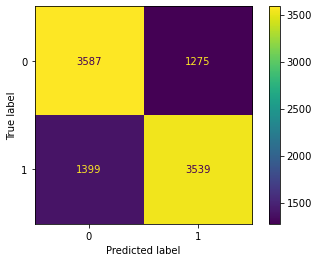

In [28]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [36]:
def plot_confusion_matrix_with_percentages(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, normalize='pred')
    cm_percentages = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 
    labels = ['0', '1']
    fig, ax = plt.subplots(figsize=(6, 4))
    im = ax.imshow(cm_percentages, cmap='RdBu_r')
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.tick_params(axis='x', rotation=45)
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{cm_percentages[i, j]:.2f}', ha='center', va='center', color='black')
    cbar = ax.figure.colorbar(im)  # Add colorbar
#     cbar.ax.set_ylabel('Percentage', rotation=-90, va="bottom")
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('Confusion Matrix')
    plt.show()

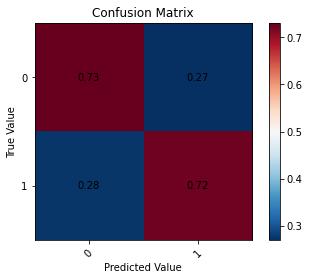

In [37]:
# Show confusion matrix
plot_confusion_matrix_with_percentages(y_test, pred_val)

## Get Feature importance from the model

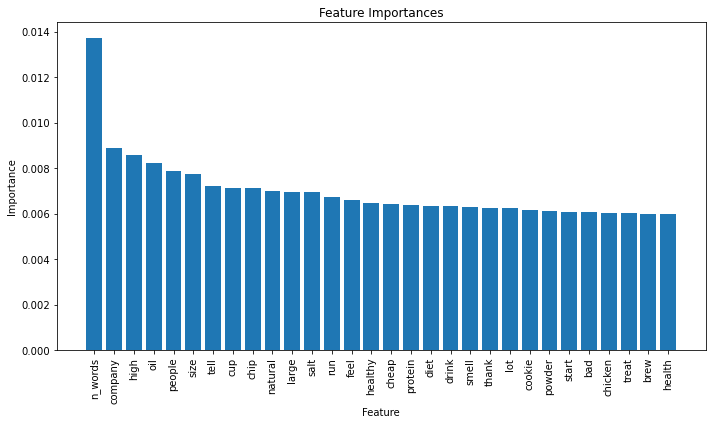

In [56]:
# Extract feature importances
importances = xgb_model_Opt.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices][0:30]
sorted_feature_names = feature_names[sorted_indices][0:30]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
# Exclude the vectorised columns and only use the extracted feature